In [848]:
#pip install seaborn

In [849]:
#pip install urllib3

In [850]:
#pip install requests

In [851]:
#pip install yfinance

In [852]:
#pip install pystan

In [853]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3
import json
import requests
from pandas.io.json import json_normalize
from datetime import datetime
import yfinance as yf

#Install Dependencies for FinBert
import tensorflow as tf
from tensorflow import keras
import torch
import re
# import nltk
# from nltk.corpus import stopwords
from nltk import tokenize
from keras.preprocessing.text import Tokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

#statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.seasonal import seasonal_decompose

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold

#Model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

#Time series prediction
from  prophet import Prophet



In [854]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_11-12.2022.csv")


In [855]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_dec_jan.csv")

                                                                                    Collect data from yfinance 

In [856]:
sp500=yf.Ticker("^GSPC")

In [857]:
GTHX=yf.Ticker("GTHX")

In [858]:
sp500.get_news()

[{'uuid': '08e76352-fc53-303f-82f9-ee93713d8c30',
  'title': 'Lucid stock falls 18%, on pace for largest drop in a more than a year',
  'publisher': 'MarketWatch',
  'link': 'https://finance.yahoo.com/m/08e76352-fc53-303f-82f9-ee93713d8c30/lucid-stock-falls-18%25%2C-on.html',
  'providerPublishTime': 1677171480,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/S8SCotpO9m2XQyQUIGU5dw--~B/aD02MzA7dz0xMjAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/marketwatch.com/96d076434b2a015a3010bd2787b8c856',
     'width': 1200,
     'height': 630,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/FUOaXzXTWeRpF8AHxhm.PQ--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/marketwatch.com/96d076434b2a015a3010bd2787b8c856',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['^GSPC']},
 {'uuid': 'f9caba3f-be42-3213-a1b8-92bc55829288',
  'title': 'Lucid Stock Drops

In [1017]:
index_price=sp500.history(start="2022-11-01", end="2023-01-12",)
index_price_real=sp500.history(start="2022-11-01", end="2023-11-12",)

In [860]:
index_price_13m=sp500.history(start="2022-01-01", end="2023-01-31",)
index_price_13m.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)
index_price_13m=index_price_13m.tz_localize(None)

In [861]:
index_price.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)

In [862]:
index_price=index_price.tz_localize(None)

<AxesSubplot:xlabel='Date', ylabel='Close'>

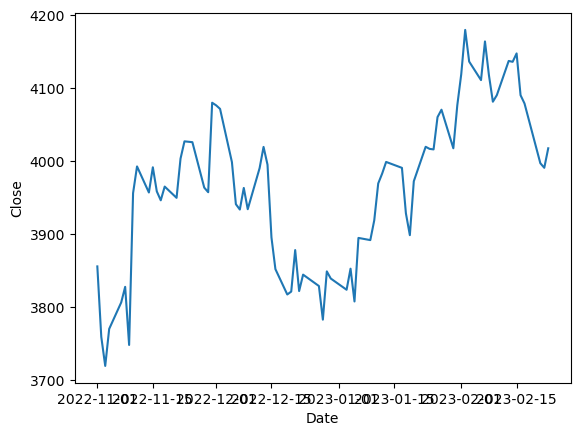

In [1019]:
sns.lineplot(data=index_price_real["Close"])

In [1018]:
index_price_real

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-01 00:00:00-04:00,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,0.0,0.0
2022-11-02 00:00:00-04:00,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,0.0,0.0
2022-11-03 00:00:00-04:00,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,0.0,0.0
2022-11-04 00:00:00-04:00,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,0.0,0.0
2022-11-07 00:00:00-05:00,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-16 00:00:00-05:00,4114.750000,4136.540039,4089.489990,4090.409912,4143660000,0.0,0.0
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,0.0,0.0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,0.0,0.0


In [863]:
index_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    49 non-null     float64
 1   High    49 non-null     float64
 2   Low     49 non-null     float64
 3   Close   49 non-null     float64
 4   Volume  49 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


                                                                                    DATA WRANGLING & CLEANING 

In [864]:
#index=pd.read_csv

In [865]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   title         10000 non-null  object
 2   url           10000 non-null  object
 3   description   10000 non-null  object
 4   source        10000 non-null  object
 5   tickers       10000 non-null  object
 6   tags          10000 non-null  object
 7   published_at  10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [866]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [867]:
news_2.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [868]:
news.isna().sum()

title           0
url             0
description     0
source          0
tickers         0
tags            0
published_at    0
dtype: int64

In [869]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         10000 non-null  object
 1   url           10000 non-null  object
 2   description   10000 non-null  object
 3   source        10000 non-null  object
 4   tickers       10000 non-null  object
 5   tags          10000 non-null  object
 6   published_at  10000 non-null  object
dtypes: object(7)
memory usage: 547.0+ KB


<AxesSubplot:xlabel='source', ylabel='count'>

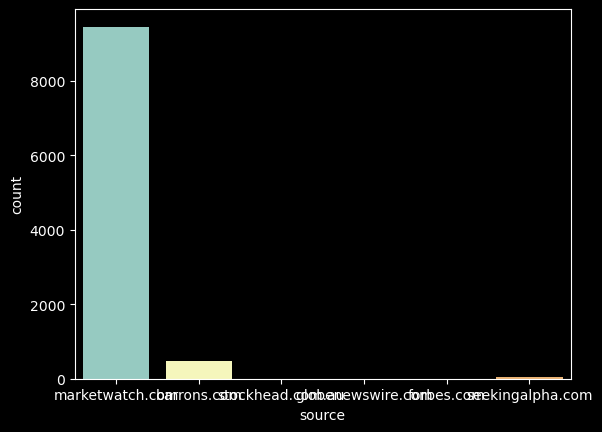

In [870]:
sns.countplot(data=news,x="source")

                                                                            FinBERT test

Test

In [871]:
tokens=tokenizer.encode("wells fargo maintains overweight on agilent technologies raises price target to 95.",return_tensors="pt")
tokens

tensor([[  101,  7051, 23054,  9319,  2058, 11179,  2006, 29003,  3372,  6786,
         13275,  3976,  4539,  2000,  5345,  1012,   102]])

In [872]:
result=model(tokens)
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [873]:
result.logits

tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>)

In [874]:

(torch.argmax(result.logits))+1


tensor(1)

                                                Apllying Model on tittles

In [875]:
def sentiment_score(text):
    tokens=tokenizer.encode(text,return_tensors="pt")
    result=model(tokens)
    return int(torch.argmax(result.logits))+1




In [876]:

#news["sentiment_title"]=news["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [877]:

#news_2["sentiment_title"]=news_2["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [878]:
#news_2["sentiment_description"]=news_2["description"].apply(lambda x:sentiment_score(x[:512]))

In [879]:
#news_2.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_3.csv")

In [880]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [881]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_3.csv")

In [882]:
news=news.append(news_2)

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_72457/2509051536.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news=news.append(news_2)


In [883]:
news["date"]=pd.to_datetime(news["published_at"]).dt.date


In [884]:
news.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_date.csv")

In [885]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             20000 non-null  int64 
 1   title                  20000 non-null  object
 2   url                    20000 non-null  object
 3   description            20000 non-null  object
 4   source                 20000 non-null  object
 5   tickers                20000 non-null  object
 6   tags                   20000 non-null  object
 7   published_at           20000 non-null  object
 8   sentiment_title        20000 non-null  int64 
 9   sentiment_description  20000 non-null  int64 
 10  date                   20000 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.8+ MB


In [886]:
news

,Unnamed: 0,title,url,description,source,tickers,tags,published_at,sentiment_title,sentiment_description,date
0,0,Johnson & Johnson to buy Abiomed for $16.6 bil...,https://www.marketwatch.com/story/abiomed-stoc...,Shares of Abiomed Inc. undefined rocketed 48.8...,marketwatch.com,"['abmd', 'jnj', 'spx']","['Abmd', 'Article_Normal', 'Healthcare', 'Jnj'...",2022-11-01T09:37:35+00:00,3,1,2022-11-01
1,1,Abiomed stock rockets after J&J buyout deal va...,https://www.marketwatch.com/story/abiomed-stoc...,Shares of Abiomed Inc. undefined rocketed 48.8...,marketwatch.com,"['abmd', 'jnj', 'spx']","['Abmd', 'Article_Normal', 'Healthcare', 'Jnj'...",2022-11-01T09:43:11+00:00,1,1,2022-11-01
2,2,Bitcoin Is Holding. Traders Are Hoping the Fed...,https://www.barrons.com/articles/bitcoin-price...,Given their link to other risk-sensitive asset...,barrons.com,"['djia', 'spx']","['Adausd', 'Banking', 'Bitcoin', 'Bitcoin Usd'...",2022-11-01T09:47:00+00:00,1,1,2022-11-01
3,3,Bitcoin Is Holding. Traders Are Hoping the Fed...,https://www.barrons.com/articles/bitcoin-crypt...,Given their link to other risk-sensitive asset...,barrons.com,"['djia', 'spx', 'tall']","['Adausd', 'Banking', 'Bitcoin Usd', 'Blockcha...",2022-11-01T09:47:00+00:00,1,1,2022-11-01
4,4,Pfizer says late-stage trial of RSV vaccine pr...,https://www.marketwatch.com/story/pfizer-says-...,Pfizer Inc. undefined said Tuesday a late-stag...,marketwatch.com,"['pfe', 'spx']","['Article_Normal', 'Healthcare', 'Pfe', 'Spx',...",2022-11-01T09:48:05+00:00,1,1,2022-11-01
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Morgan Stanley stock outperforms competitors o...,https://www.marketwatch.com/story/morgan-stanl...,Shares of Morgan Stanley rose 1.23% to $90.53 ...,marketwatch.com,"['barl', 'djia', 'jpm', 'ms', 'msk', 'mwg', 'm...","['Djia', 'ETF', 'Financial Services', 'Jpm', '...",2023-01-12T22:11:00+00:00,1,1,2023-01-12
9996,9996,"Motorola Solutions Inc. stock rises Thursday, ...",https://www.marketwatch.com/story/motorola-sol...,Shares of Motorola Solutions Inc. inched 0.14%...,marketwatch.com,"['axon', 'djia', 'lhx', 'msi', 'siox', 'spx', ...","['Axon', 'Djia', 'ETF', 'Healthcare', 'Industr...",2023-01-12T22:11:00+00:00,1,1,2023-01-12
9997,9997,"NextEra Energy Inc. stock rises Thursday, stil...",https://www.marketwatch.com/story/nextera-ener...,Shares of NextEra Energy Inc. inched 0.08% hig...,marketwatch.com,"['aep', 'djia', 'fpl', 'nee', 'nep', 'spx']","['Aep', 'D', 'Djia', 'ETF', 'Fpl', 'Nee', 'So'...",2023-01-12T22:11:00+00:00,1,1,2023-01-12
9998,9998,"Newmont Corp. stock rises Thursday, outperform...",https://www.marketwatch.com/story/newmont-corp...,Shares of Newmont Corp. rallied 1.79% to $53.4...,marketwatch.com,"['djia', 'nem', 'rgld', 'spx']","['Basic Materials', 'Djia', 'ETF', 'Nem', 'New...",2023-01-12T22:12:00+00:00,1,1,2023-01-12


In [887]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [888]:
news.reset_index(inplace=True)

In [889]:
news.drop(labels="index",axis=1,inplace=True)

<AxesSubplot:xlabel='sentiment_description', ylabel='count'>

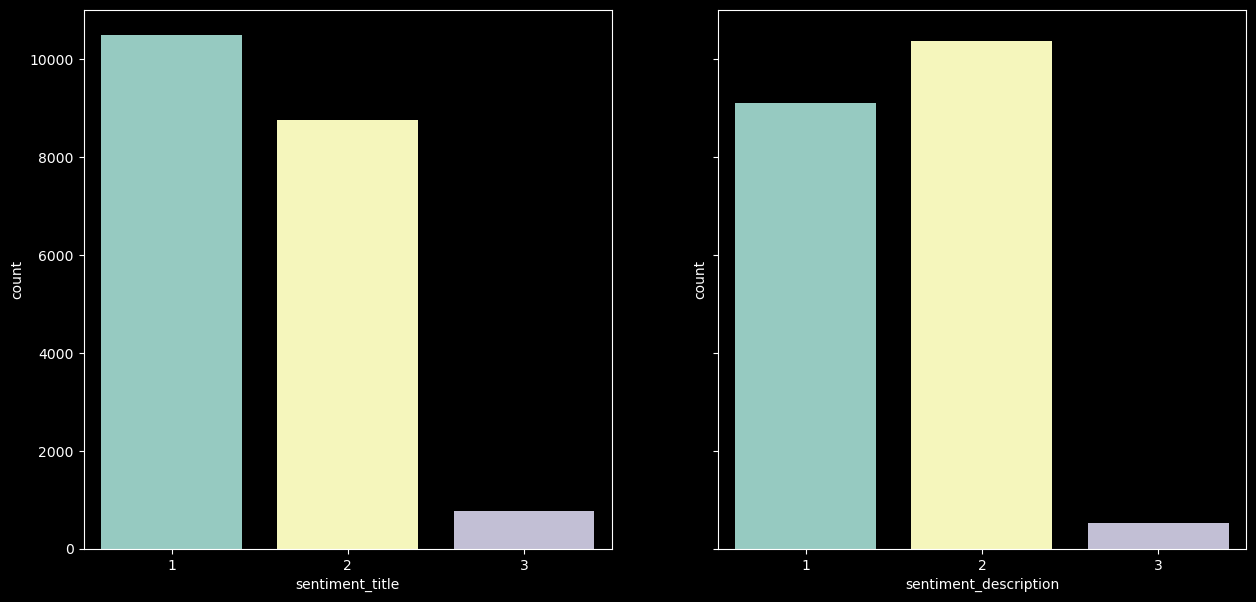

In [890]:

n_subplots=2
sharey=True
fig,axs=plt.subplots(1,n_subplots,sharey=sharey,figsize=(15,7))
sns.countplot(data=news,x="sentiment_title",ax=axs[0])
sns.countplot(data=news,x="sentiment_description",ax=axs[1])



In [891]:
#news.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [892]:
grouped_news=news.loc[:,["date","sentiment_title","sentiment_description"]].groupby(by="date",axis=0,dropna=True,as_index=True).mean()

In [893]:
grouped_news.head()

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000


<AxesSubplot:xlabel='date'>

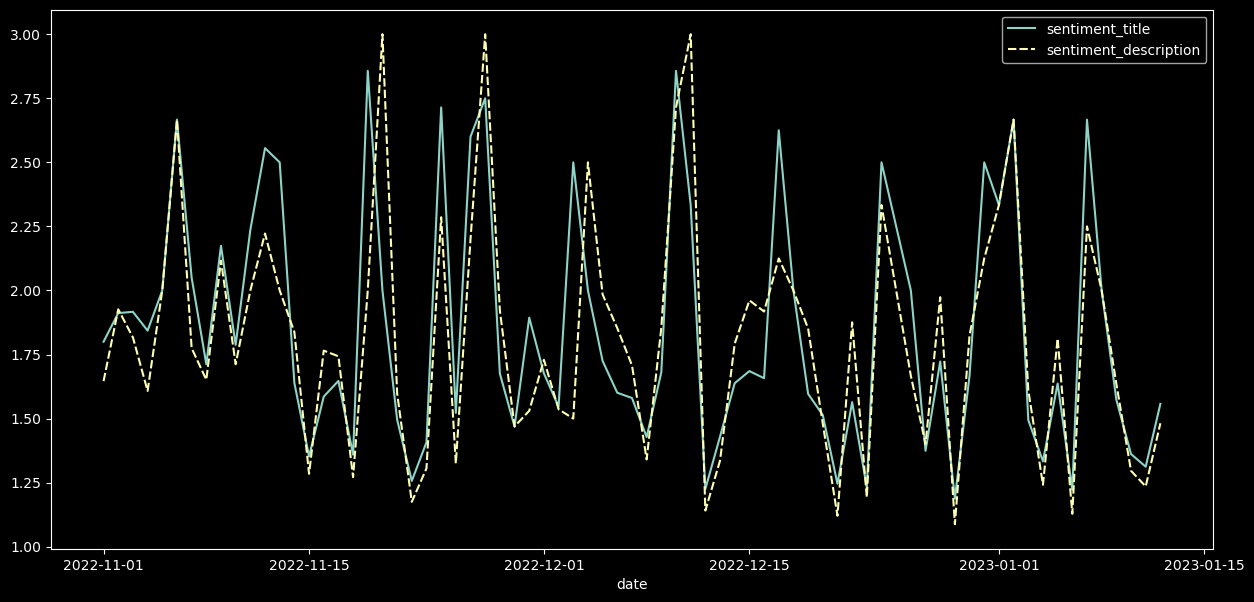

In [894]:
plt.style.use("dark_background")
fig,axs=plt.subplots(figsize=(15,7))
sns.lineplot(data=grouped_news[["sentiment_title","sentiment_description"]])


In [895]:
grouped_news

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000
...,...,...
2023-01-08,2.000000,2.000000
2023-01-09,1.573643,1.635659
2023-01-10,1.361538,1.296154


In [896]:
full_data=index_price.join(grouped_news, how="left")

In [897]:

grouped_news_2["difference"]=grouped_news["sentiment_title"]-grouped_news["sentiment_description"]



In [898]:
grouped_news

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000
...,...,...
2023-01-08,2.000000,2.000000
2023-01-09,1.573643,1.635659
2023-01-10,1.361538,1.296154


In [899]:
grouped_news_2

,difference
date,
2022-11-01,0.153846
2022-11-02,-0.014706
2022-11-03,0.100000
2022-11-04,0.235294
2022-11-05,0.000000
...,...
2023-01-08,0.000000
2023-01-09,-0.062016
2023-01-10,0.065385


In [900]:
#grouped_news_2.drop(labels=["sentiment_title","sentiment_description"],axis=1,inplace=True)

In [901]:
grouped_news

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000
...,...,...
2023-01-08,2.000000,2.000000
2023-01-09,1.573643,1.635659
2023-01-10,1.361538,1.296154


<AxesSubplot:ylabel='Count'>

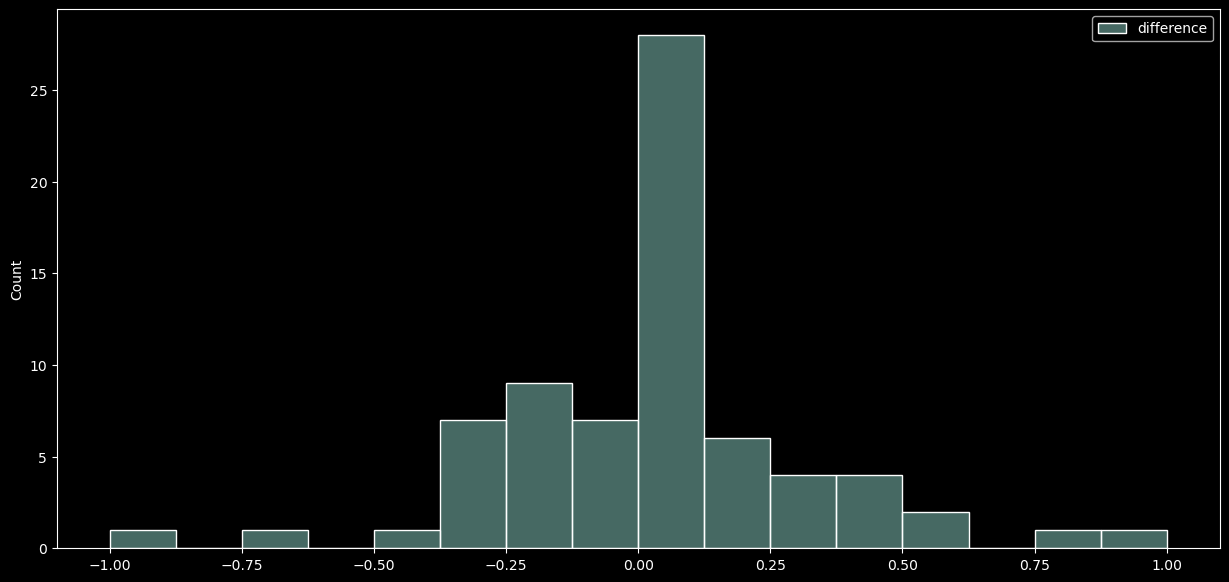

In [902]:
fig,axs=plt.subplots(figsize=(15,7))
sns.histplot(data=grouped_news_2)

In [903]:
full_data=index_price.join(grouped_news, how="left")

In [904]:
full_data

,Open,High,Low,Close,Volume,sentiment_title,sentiment_description
Date,,,,,,,
2022-11-01,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,1.800000,1.646154
2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,1.911765,1.926471
2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,1.916667,1.816667
2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,1.843137,1.607843
2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,2.050000,1.775000
2022-11-08,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,1.712121,1.651515
2022-11-09,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,2.174419,2.116279
2022-11-10,3859.889893,3958.330078,3859.889893,3956.370117,5781260000,1.787879,1.712121
2022-11-11,3963.719971,4001.479980,3944.820068,3992.929932,5593310000,2.236842,2.000000


In [905]:
full_data.drop(labels="sentiment_description",axis=1,inplace=True)

In [906]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             49 non-null     float64
 1   High             49 non-null     float64
 2   Low              49 non-null     float64
 3   Close            49 non-null     float64
 4   Volume           49 non-null     int64  
 5   sentiment_title  49 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.7 KB


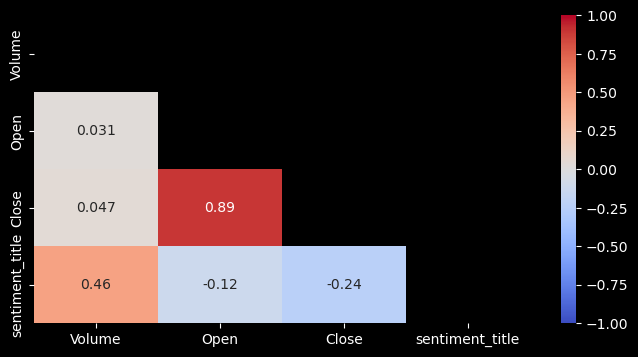

In [907]:
#Correlation matrix

fig,axs=plt.subplots(figsize=(8,4))

corr_data=full_data[["Volume","Open","Close","sentiment_title"]]
# hour_df=hour[["yr","season","holiday","mnth","weekday","orkingday","weathersit","temp","atemp","hum","windspeed","weather_score","casual","registered"]]
matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()

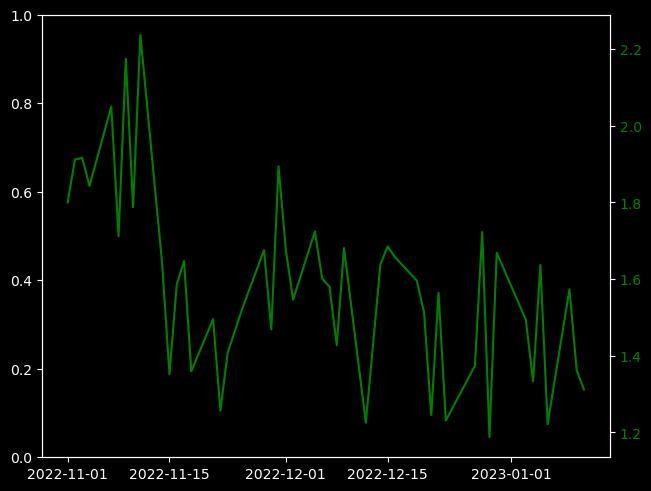

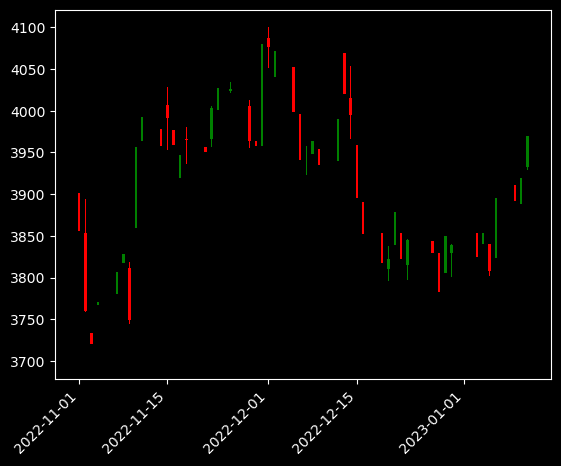

In [908]:

#fig,axs=plt.subplots(figsize=(8,4),constrained_layout=True)
fig, ax = plt.subplots(constrained_layout=True)
plt.figure()
width=.4
width2=.05

up=full_data[full_data.Close>=full_data.Open]
down=full_data[full_data.Close<full_data.Open]

col1="green"
col2="red"

plt.bar(up.index,up.Close -up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High -up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low -up.Open,width2,bottom=up.Open,color=col1)


plt.bar(down.index,down.Close -down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High -down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low -down.Close,width2,bottom=down.Close,color=col2)

plt.xticks(rotation=45,ha="right")


ax2 = ax.twinx()


ax2.plot(full_data["sentiment_title"], color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.show()

In [909]:

ax2 = ax.twinx()


ax2.plot(full_data["sentiment_title"], color='green')
ax2.tick_params(axis='y', labelcolor='green')

<AxesSubplot:xlabel='Close', ylabel='sentiment_title'>

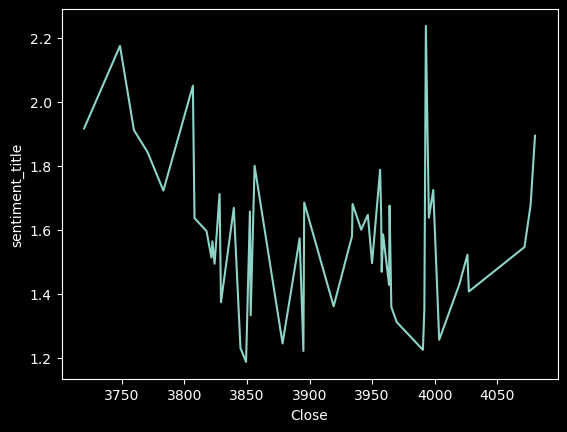

In [910]:
sns.lineplot(data=full_data, x="Close",y="sentiment_title")


                                                                                Time series decomposition

                                                                            Remooving Trend and Seasonality

In [911]:
full_data.head(10)

,Open,High,Low,Close,Volume,sentiment_title
Date,,,,,,
2022-11-01,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,1.800000
2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,1.911765
2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,1.916667
2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,1.843137
2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,2.050000
2022-11-08,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,1.712121
2022-11-09,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,2.174419
2022-11-10,3859.889893,3958.330078,3859.889893,3956.370117,5781260000,1.787879
2022-11-11,3963.719971,4001.479980,3944.820068,3992.929932,5593310000,2.236842


In [912]:
full_data.index=pd.to_datetime(full_data.index)

In [913]:
full_data

,Open,High,Low,Close,Volume,sentiment_title
Date,,,,,,
2022-11-01,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,1.800000
2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,1.911765
2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,1.916667
2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,1.843137
2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,2.050000
2022-11-08,3817.020020,3859.399902,3786.280029,3828.110107,4607640000,1.712121
2022-11-09,3810.939941,3818.199951,3744.219971,3748.570068,4645010000,2.174419
2022-11-10,3859.889893,3958.330078,3859.889893,3956.370117,5781260000,1.787879
2022-11-11,3963.719971,4001.479980,3944.820068,3992.929932,5593310000,2.236842


In [914]:
sentiment_title=full_data.sentiment_title
close_price=full_data.Close
open_price=full_data.Open

In [915]:
full_data.index

DatetimeIndex(['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-11', '2022-11-14', '2022-11-15', '2022-11-16',
               '2022-11-17', '2022-11-18', '2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-25', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-05',
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [916]:
print(pd.infer_freq(full_data.index))

None


In [917]:
# sentiment_title.index.infer_freq(freq='B')
# close_price.index.infer_freq(freq='B')
# open_price.index.infer_freq(freq='B')

In [918]:
result_sentiment=seasonal_decompose(sentiment_title,model="additive",period=5)
result_close=seasonal_decompose(close_price,model="additive",period=5)
result_open=seasonal_decompose(open_price,model="additive",period=5)

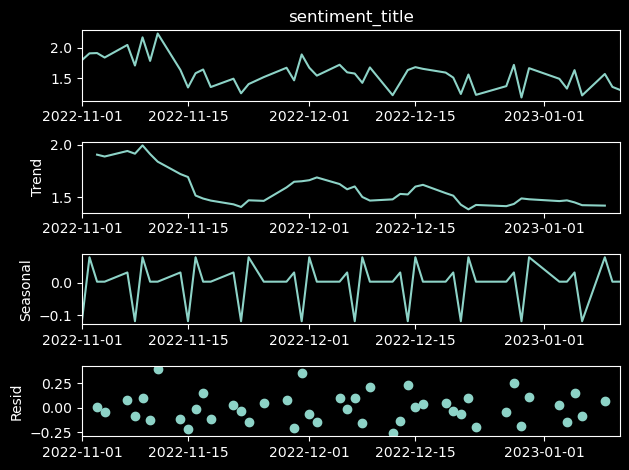

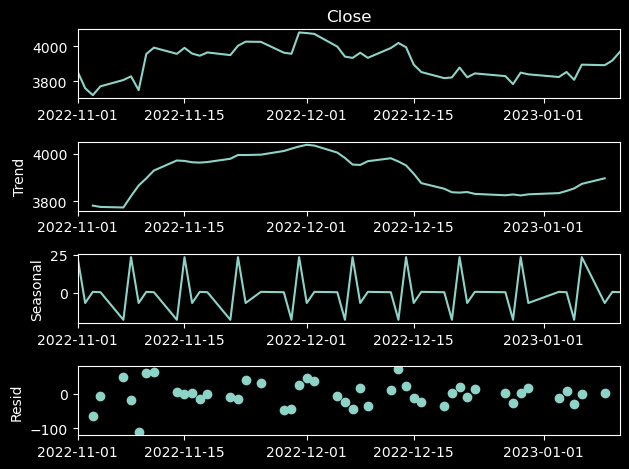

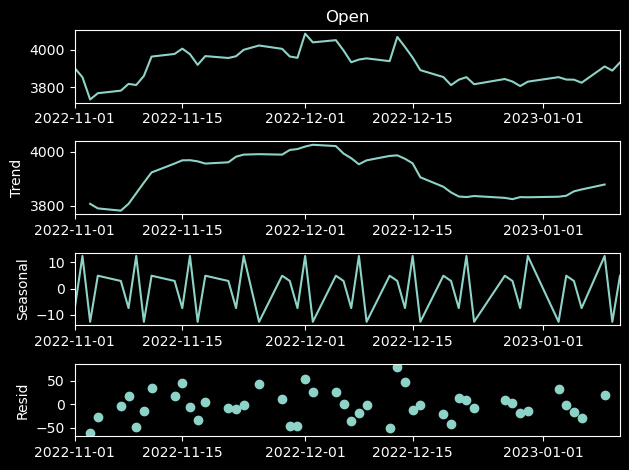

In [919]:

result_sentiment.plot()
result_close.plot()
result_open.plot()
plt.show()

                                                                                        Residuals analysis

In [920]:
# For code refactoring 
resid_sentiment=result_sentiment.resid
seasonal_open=result_open.seasonal

In [921]:
seasonal_open.tail(30)

Date
2022-11-29     2.863248
2022-11-30    -7.436047
2022-12-01    12.361311
2022-12-02   -12.646719
2022-12-05     4.858207
2022-12-06     2.863248
2022-12-07    -7.436047
2022-12-08    12.361311
2022-12-09   -12.646719
2022-12-12     4.858207
2022-12-13     2.863248
2022-12-14    -7.436047
2022-12-15    12.361311
2022-12-16   -12.646719
2022-12-19     4.858207
2022-12-20     2.863248
2022-12-21    -7.436047
2022-12-22    12.361311
2022-12-23   -12.646719
2022-12-27     4.858207
2022-12-28     2.863248
2022-12-29    -7.436047
2022-12-30    12.361311
2023-01-03   -12.646719
2023-01-04     4.858207
2023-01-05     2.863248
2023-01-06    -7.436047
2023-01-09    12.361311
2023-01-10   -12.646719
2023-01-11     4.858207
Name: seasonal, dtype: float64

In [922]:
df_sentiment_total = pd.concat([result_sentiment.seasonal, result_sentiment.trend, result_sentiment.resid, result_sentiment.observed],axis=1)
df_sentiment_total.columns=['seasonality', 'trend', 'residuals', 'sentiment']
df_sentiment_total.head(5)



,seasonality,trend,residuals,sentiment
Date,,,,
2022-11-01,-0.118713,NaN,NaN,1.800000
2022-11-02,0.079252,NaN,NaN,1.911765
2022-11-03,0.003618,1.904314,0.008735,1.916667
2022-11-04,0.003674,1.886738,-0.047275,1.843137
2022-11-07,0.032169,1.939269,0.078562,2.050000


In [923]:
df_close_total = pd.concat([result_close.seasonal, result_close.trend, result_close.resid, result_close.observed],axis=1)
df_close_total.columns=['seasonality', 'trend', 'residuals', 'close']
df_close_total.head()

,seasonality,trend,residuals,close
Date,,,,
2022-11-01,23.409797,NaN,NaN,3856.100098
2022-11-02,-6.695997,NaN,NaN,3759.689941
2022-11-03,0.622888,3782.606006,-63.339002,3719.889893
2022-11-04,0.389995,3777.008008,-6.847954,3770.550049
2022-11-07,-17.726683,3774.784033,49.742699,3806.800049


In [924]:
df_open_total = pd.concat([result_open.seasonal, result_open.trend, result_open.resid, result_open.observed],axis=1)
df_open_total.columns=['seasonality', 'trend', 'residuals', 'open']
df_open_total.head()

,seasonality,trend,residuals,open
Date,,,,
2022-11-01,-7.436047,NaN,NaN,3901.790039
2022-11-02,12.361311,NaN,NaN,3852.899902
2022-11-03,-12.646719,3807.125977,-61.229258,3733.250000
2022-11-04,4.858207,3790.171973,-28.050200,3766.979980
2022-11-07,2.863248,3781.779980,-3.933267,3780.709961


In [925]:
df_residuals=df_sentiment_total.join(df_open_total,how="left",rsuffix="_open")
df_residuals=df_residuals.join(df_close_total,how="left",rsuffix="_close")



In [926]:
df_residuals.head(5)

,seasonality,trend,residuals,sentiment,seasonality_open,trend_open,residuals_open,open,seasonality_close,trend_close,residuals_close,close
Date,,,,,,,,,,,,
2022-11-01,-0.118713,NaN,NaN,1.800000,-7.436047,NaN,NaN,3901.790039,23.409797,NaN,NaN,3856.100098
2022-11-02,0.079252,NaN,NaN,1.911765,12.361311,NaN,NaN,3852.899902,-6.695997,NaN,NaN,3759.689941
2022-11-03,0.003618,1.904314,0.008735,1.916667,-12.646719,3807.125977,-61.229258,3733.250000,0.622888,3782.606006,-63.339002,3719.889893
2022-11-04,0.003674,1.886738,-0.047275,1.843137,4.858207,3790.171973,-28.050200,3766.979980,0.389995,3777.008008,-6.847954,3770.550049
2022-11-07,0.032169,1.939269,0.078562,2.050000,2.863248,3781.779980,-3.933267,3780.709961,-17.726683,3774.784033,49.742699,3806.800049


In [927]:
df_residuals_time=df_residuals.iloc[:,[2,10]]

In [928]:
df_residuals.reset_index(inplace=True)


In [929]:
df_residuals_close=df_residuals.iloc[:,[3,11]]

In [930]:
df_residuals_close.dropna(axis=0,inplace=True)

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_72457/1553128175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residuals_close.dropna(axis=0,inplace=True)


In [931]:
#Standartization

scX=StandardScaler()
df_residuals_close_st=scX.fit_transform(df_residuals_close)


In [932]:
df_residuals_time_st=scX.fit_transform(df_residuals_time)

In [933]:
date=df_residuals_time.reset_index()

In [934]:
#date.drop(labels=["index","residuals","residuals_close"],axis=1,inplace=True)

In [935]:
df_residuals_close_st=pd.DataFrame(df_residuals_close_st,columns=["residual_sentiment","residual_close"])

In [936]:
df_residuals_time_st=pd.DataFrame(df_residuals_time_st,columns=["residual_sentiment","residual_close"])

In [937]:
df_residuals_time_st=df_residuals_time_st.join(date)

In [938]:
df_residuals_time_st

,residual_sentiment,residual_close,Date,residuals,residuals_close
0,NaN,NaN,2022-11-01,NaN,NaN
1,NaN,NaN,2022-11-02,NaN,NaN
2,0.047572,-1.815471,2022-11-03,0.008735,-63.339002
3,-0.332246,-0.162174,2022-11-04,-0.047275,-6.847954
4,0.521097,1.494038,2022-11-07,0.078562,49.742699
5,-0.572323,-0.470404,2022-11-08,-0.082677,-17.379768
6,0.686240,-3.218831,2022-11-09,0.102915,-111.289989
7,-0.864619,1.767928,2022-11-10,-0.125780,59.101184
8,2.667780,1.887006,2022-11-11,0.395119,63.169918
9,-0.781811,0.142509,2022-11-14,-0.113569,3.562669


In [939]:
#Augmented Dickey Fuller Test (ADF Test) - stationary

# ADF Test
result = adfuller(df_residuals_close_st["residual_close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.8858839260536793
n_lags: 0.0470143015916542
p-value: 0.0470143015916542
Critial Values:
   1%, -3.639224104416853
Critial Values:
   5%, -2.9512301791166293
Critial Values:
   10%, -2.614446989619377


In [940]:
#Augmented Dickey Fuller Test (ADF Test) stationary

# ADF Test
result = adfuller(df_residuals_close_st["residual_sentiment"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -8.647210017650938
n_lags: 5.2314190513620264e-14
p-value: 5.2314190513620264e-14
Critial Values:
   1%, -3.5925042342183704
Critial Values:
   5%, -2.931549768951162
Critial Values:
   10%, -2.60406594375338


<AxesSubplot:>

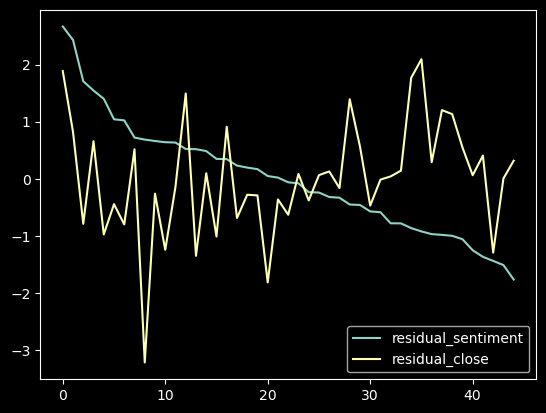

In [941]:
df_residuals_close_st.sort_values(by="residual_sentiment",axis=0,ascending=False).plot(use_index=False)


<AxesSubplot:>

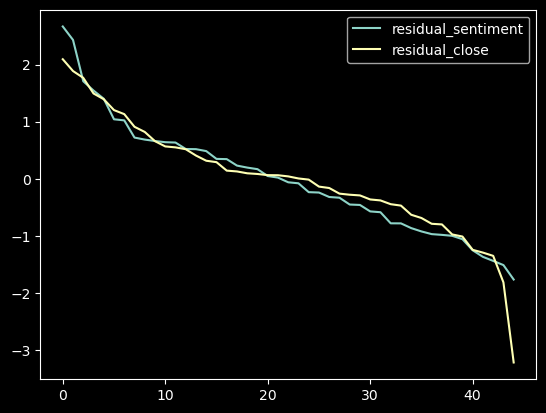

In [942]:

df_residuals_close_st["residual_sentiment"].sort_values(axis=0,ascending=False).plot(use_index=False,legend=True)
df_residuals_close_st["residual_close"].sort_values(axis=0,ascending=False).plot(use_index=False,legend=True)

In [943]:
#Anomaly detection 
print(df_residuals_time_st.mean())
print(df_residuals_time_st.std())

residual_sentiment   -2.343804e-17
residual_close        6.476301e-18
residuals             1.719529e-03
residuals_close      -1.306667e+00
dtype: float64
residual_sentiment                        1.0113
residual_close                            1.0113
Date                  21 days 06:35:43.190886956
residuals                                0.14913
residuals_close                         34.55482
dtype: object


/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_72457/278111036.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df_residuals_time_st.mean())


<AxesSubplot:xlabel='Date', ylabel='residual_sentiment'>

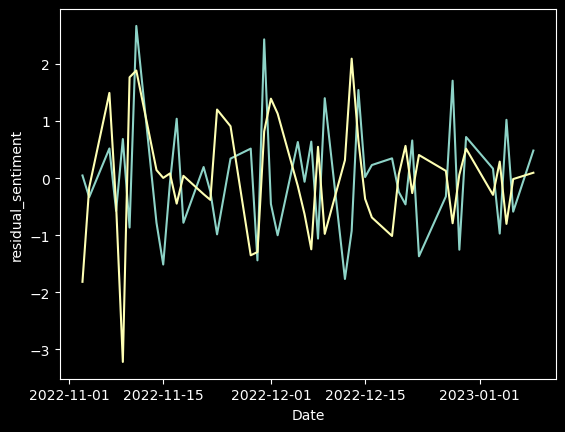

In [944]:
sns.lineplot(data=df_residuals_time_st,x="Date",y="residual_sentiment")
sns.lineplot(data=df_residuals_time_st,x="Date",y="residual_close")

                                                                        Synchrony between time series data

In [945]:
#Pearson correlation

overall_pearson_r = df_residuals_close_st.corr().iloc[0,1]
print(f"Pearson r: {overall_pearson_r}")

Pearson r: -0.1272797341577512


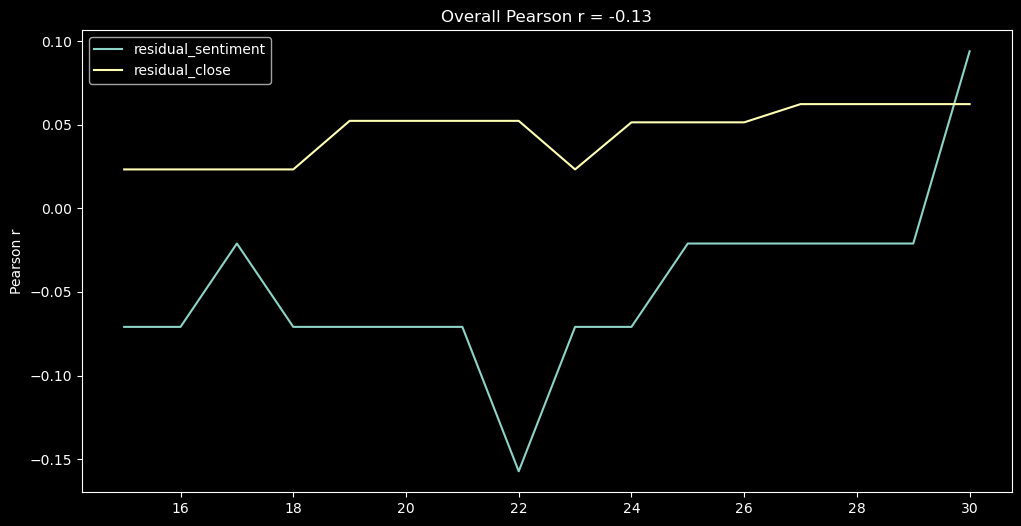

In [946]:
f,ax=plt.subplots(figsize=(12,6))
df_residuals_close_st.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");


In [947]:
#Time Lagged Cross Correlation — assessing signal dynamics
#https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9

In [948]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

        

In [949]:
#sns.lineplot(data=df_residuals_time_st,x="Date",y="residual_sentiment")
#sns.lineplot(data=df_residuals_time_st,x="Date",y="residual_close")

/Users/Yanaorfin_1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/Yanaorfin_1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


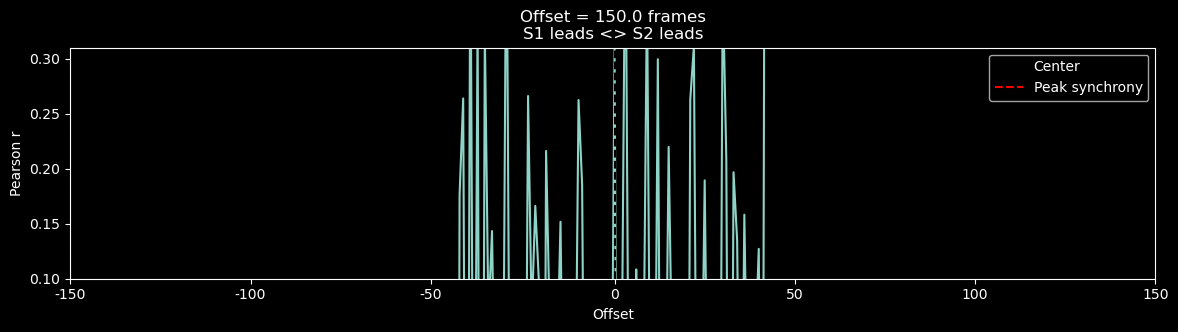

In [950]:
d1 = df_residuals_close_st['residual_sentiment']
d2 = df_residuals_close_st['residual_close']
days = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days*fps),int(days*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [951]:
len(rs)/2

150.5

In [952]:
np.argmax(rs)

0

                                                                        Regression analysis of the stationary data 

In [1000]:
df_residuals_close_st.head(50)

,residual_sentiment,residual_close
0,0.047572,-1.815471
1,-0.332246,-0.162174
2,0.521097,1.494038
3,-0.572323,-0.470404
4,0.686240,-3.218831
5,-0.864619,1.767928
6,2.667780,1.887006
7,-0.781811,0.142509
8,-1.512364,0.005117
9,-0.079738,0.083663


In [954]:
X=df_residuals_close_st[["residual_sentiment"]]
y=df_residuals_close_st[["residual_close"]]

In [955]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31, 1)
(14, 1)
(31, 1)
(14, 1)


In [956]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [1001]:
y_predict_res=lr.predict(X_test)

In [1002]:
y_predict_res.shape

(14, 1)

In [994]:
y_test.shape

(14, 1)

In [958]:
print("Inrecept is " + str(lr.intercept_))
print("R-squared value is ",lr.score(X_train,y_train))
print("Adjusted R-squared value is",r2_score(y_test, y_predict_res,multioutput='variance_weighted'))
print("MSE:", mean_squared_error(y_test, y_predict_res))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_predict_res)))
print("MAE:",mean_absolute_error(y_test, y_predict_res))

Inrecept is [0.02546754]
R-squared value is  0.025132809543789825
Adjusted R-squared value is -0.027797307957053707
MSE: 0.671664049458597
RMSE: 0.8195511268118646
MAE: 0.6168263173439843


In [1007]:
y_prediction_rs=pd.DataFrame(y_predict_res,columns={"predicted_values":y_predict_res})

In [1009]:
y_test.reset_index(inplace=True,drop=True)
#y_test.drop(labels="index",axis=1,inplace=True)

In [1010]:
y_test

,residual_close
0,-0.470404
1,1.494038
2,-0.687710
3,-0.137589
4,-0.630771
5,0.290577
6,1.393166
7,0.406216
8,-0.260807
9,0.566332


<AxesSubplot:>

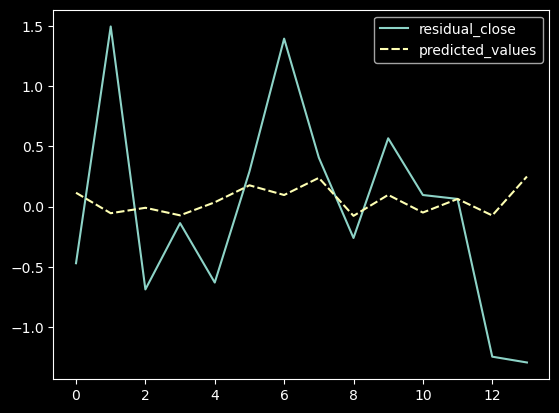

In [1012]:
lr_performance_res=pd.concat([y_test,y_prediction_rs],axis=1)
lr_performance_res.rename(columns={"Close":"actual_values"},inplace=True)
sns.lineplot(data=lr_performance_res)

                                                                                                            non-stationary data

In [965]:
#Augmented Dickey Fuller Test (ADF Test) - non-stationary

# ADF Test
result = adfuller(full_data["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.158002571112376
n_lags: 0.22183948229034844
p-value: 0.22183948229034844
Critial Values:
   1%, -3.5745892596209488
Critial Values:
   5%, -2.9239543084490744
Critial Values:
   10%, -2.6000391840277777


In [966]:
#Augmented Dickey Fuller Test (ADF Test) - non-stationary

# ADF Test
result = adfuller(full_data["sentiment_title"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 
      #The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

ADF Statistic: -1.959571937637865
n_lags: 0.30457572028156965
p-value: 0.30457572028156965
Critial Values:
   1%, -3.5812576580093696
Critial Values:
   5%, -2.9267849124681518
Critial Values:
   10%, -2.6015409829867675


In [967]:
# ADF Test non-stationary
result = adfuller(index_price_13m["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

    #The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

ADF Statistic: -2.652761382221548
n_lags: 0.08257533145900703
p-value: 0.08257533145900703
Critial Values:
   1%, -3.4548957220044336
Critial Values:
   5%, -2.8723451788613157
Critial Values:
   10%, -2.572527778361272


<AxesSubplot:xlabel='Date'>

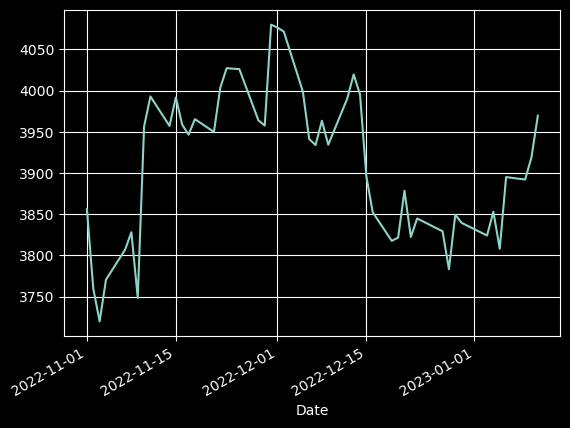

In [968]:
full_data["Close"].plot(grid="on")

In [969]:
full_data.head()

,Open,High,Low,Close,Volume,sentiment_title
Date,,,,,,
2022-11-01,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,1.800000
2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,1.911765
2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,1.916667
2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000,1.843137
2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000,2.050000


<AxesSubplot:xlabel='Date'>

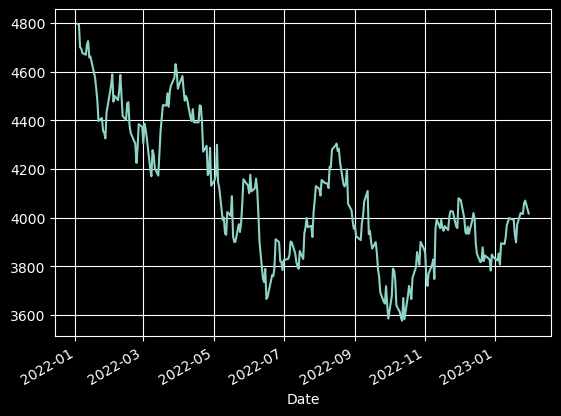

In [970]:
index_price_13m["Close"].plot(grid="on")

                                                                                            FB Prophet 

In [971]:
# Training model 

df_close=full_data.drop(["sentiment_title","Open","High","Low","Volume"],axis=1)
df_score=full_data.drop(["Close","Open","High","Low","Volume"],axis=1)


In [972]:
df_close.reset_index(inplace=True)
df_score.reset_index(inplace=True)


In [973]:
df_close = df_close.rename(columns = {'Date':'ds',"Close":"y"})
df_score = df_score.rename(columns = {'Date':'ds',"sentiment_title":"y"})

In [974]:
m=Prophet(interval_width=0.95)
model=m.fit(df_close)


18:20:25 - cmdstanpy - INFO - Chain [1] start processing


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


18:20:25 - cmdstanpy - INFO - Chain [1] done processing


In [975]:
m2=Prophet(interval_width=0.95)
model2=m2.fit(df_score)

18:20:25 - cmdstanpy - INFO - Chain [1] start processing
18:20:25 - cmdstanpy - INFO - Chain [1] done processing


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [976]:
#Forecast "Close" price
future=m.make_future_dataframe(periods=30,freq="B")
forecest_close=m.predict(future)

In [977]:
#Forecast "SEntiment title" 
future2=m2.make_future_dataframe(periods=30,freq="B")
forecest_score=m2.predict(future2)

In [978]:
forecest_close.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,2092.582391,3679.325816,3862.815658,2092.582391,2092.582391,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,0.0,0.0,0.0,3772.633024
1,2022-11-02,2105.506571,3693.325139,3878.189626,2105.506571,2105.506571,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,0.0,0.0,0.0,3782.174747
2,2022-11-03,2118.430751,3702.464936,3879.257160,2118.430751,2118.430751,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,0.0,0.0,0.0,3787.159064
3,2022-11-04,2131.354930,3725.201480,3904.851741,2131.354930,2131.354930,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,0.0,0.0,0.0,3814.476270
4,2022-11-07,2170.127469,3743.760165,3925.138449,2170.127469,2170.127469,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,0.0,0.0,0.0,3831.942764


In [979]:
index_price.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-01,3901.790039,3911.790039,3843.800049,3856.100098,4481210000
2022-11-02,3852.899902,3894.439941,3758.679932,3759.689941,4899000000
2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,4625290000
2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,5400180000
2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,4341620000


In [980]:
forecest_close.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,2092.582391,3679.325816,3862.815658,2092.582391,2092.582391,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,0.0,0.0,0.0,3772.633024
1,2022-11-02,2105.506571,3693.325139,3878.189626,2105.506571,2105.506571,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,0.0,0.0,0.0,3782.174747
2,2022-11-03,2118.430751,3702.464936,3879.257160,2118.430751,2118.430751,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,0.0,0.0,0.0,3787.159064
3,2022-11-04,2131.354930,3725.201480,3904.851741,2131.354930,2131.354930,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,0.0,0.0,0.0,3814.476270
4,2022-11-07,2170.127469,3743.760165,3925.138449,2170.127469,2170.127469,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,0.0,0.0,0.0,3831.942764


<AxesSubplot:xlabel='Date', ylabel='Close'>

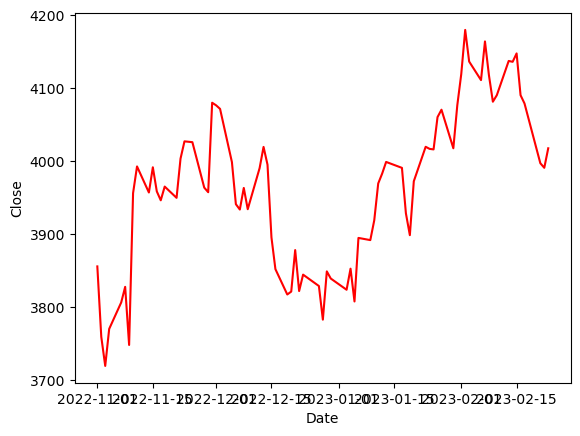

In [1023]:
sns.lineplot(data=index_price_real["Close"],color='red')

<AxesSubplot:xlabel='ds', ylabel='y'>

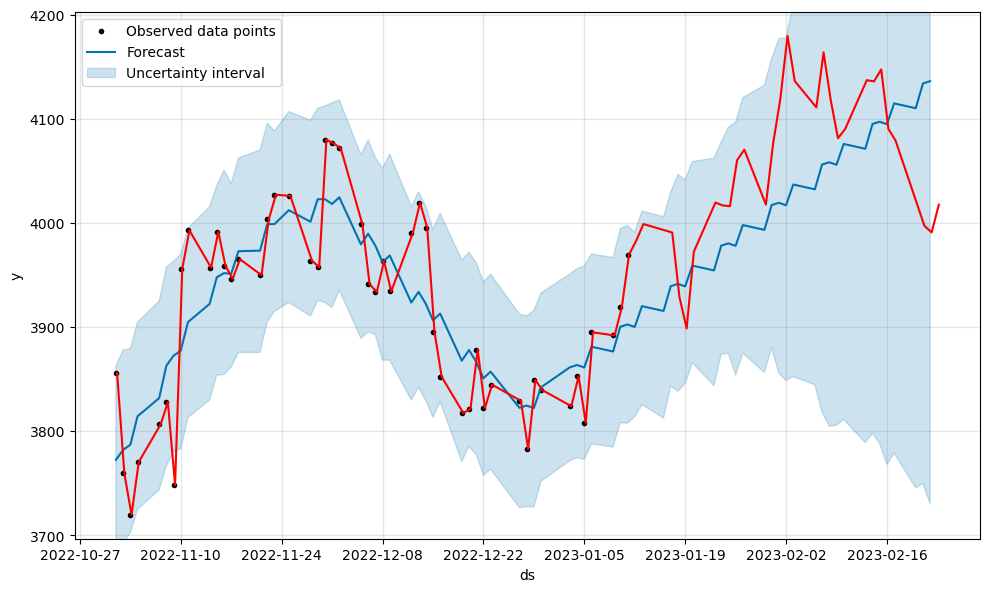

In [1025]:
plt.style.use("default")
plot1=m.plot(forecest_close)
sns.lineplot(data=index_price_real["Close"],color='red')


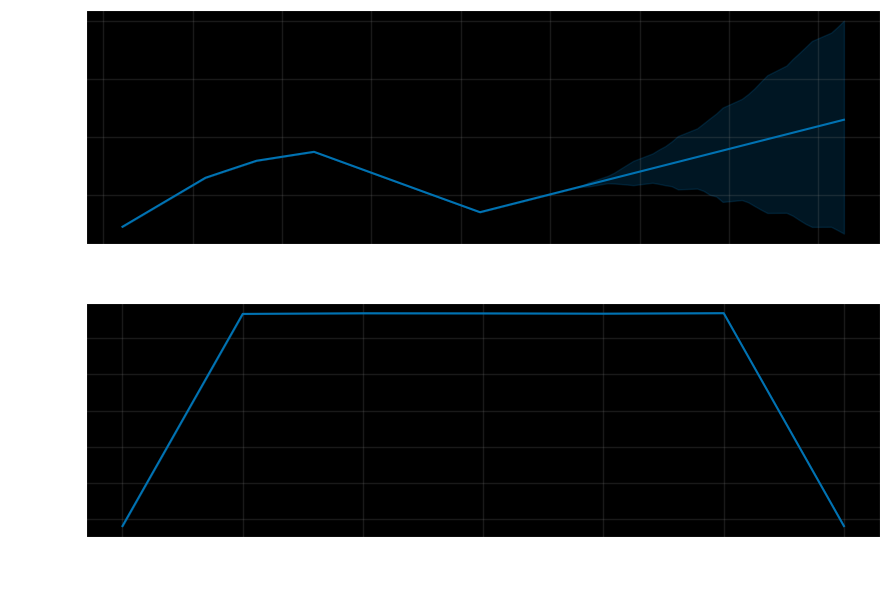

In [982]:
plot2=m.plot_components(forecest_close)

In [983]:
forecest_score.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1.009516,1.333368,2.092202,1.009516,1.009516,0.702610,0.702610,0.702610,0.702610,0.702610,0.702610,0.0,0.0,0.0,1.712126
1,2022-11-02,1.003100,1.458933,2.220911,1.003100,1.003100,0.839965,0.839965,0.839965,0.839965,0.839965,0.839965,0.0,0.0,0.0,1.843065
2,2022-11-03,0.996684,1.427957,2.209479,0.996684,0.996684,0.827146,0.827146,0.827146,0.827146,0.827146,0.827146,0.0,0.0,0.0,1.823830
3,2022-11-04,0.990268,1.424860,2.209480,0.990268,0.990268,0.808481,0.808481,0.808481,0.808481,0.808481,0.808481,0.0,0.0,0.0,1.798749
4,2022-11-07,0.971021,1.422980,2.184191,0.971021,0.971021,0.819861,0.819861,0.819861,0.819861,0.819861,0.819861,0.0,0.0,0.0,1.790881
5,2022-11-08,0.964605,1.299521,2.031369,0.964605,0.964605,0.702610,0.702610,0.702610,0.702610,0.702610,0.702610,0.0,0.0,0.0,1.667215
6,2022-11-09,0.958189,1.391188,2.157415,0.958189,0.958189,0.839965,0.839965,0.839965,0.839965,0.839965,0.839965,0.0,0.0,0.0,1.798154
7,2022-11-10,0.951773,1.420421,2.138547,0.951773,0.951773,0.827146,0.827146,0.827146,0.827146,0.827146,0.827146,0.0,0.0,0.0,1.778919
8,2022-11-11,0.945357,1.389238,2.113991,0.945357,0.945357,0.808481,0.808481,0.808481,0.808481,0.808481,0.808481,0.0,0.0,0.0,1.753838
9,2022-11-14,0.926109,1.378416,2.116710,0.926109,0.926109,0.819861,0.819861,0.819861,0.819861,0.819861,0.819861,0.0,0.0,0.0,1.745970


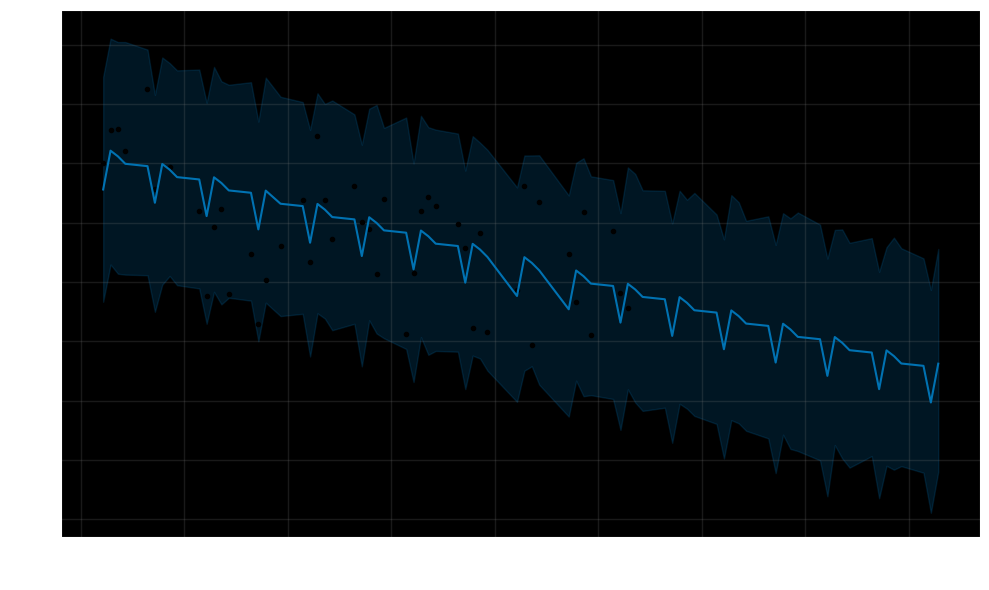

In [984]:
plot_score1=m2.plot(forecest_score)

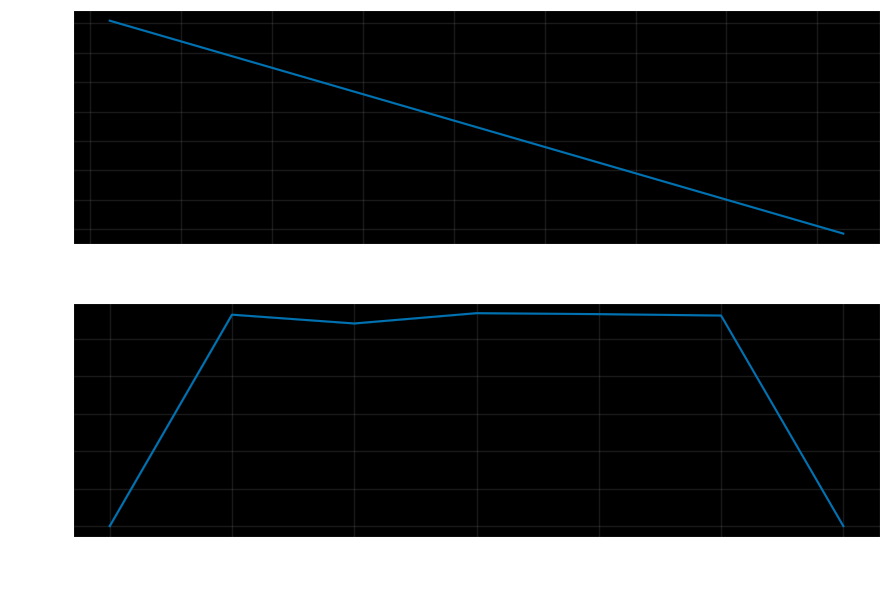

In [985]:
plot_score2=m2.plot_components(forecest_score)

In [986]:
forecast=forecest_close.join(forecest_score,rsuffix="_a")

In [987]:
forecast=forecast.loc[:,["ds","yhat","yhat_a"]]

In [988]:
forecast.info()
#df2['yhat'] = df2['trend'] + df2['seasonal']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      79 non-null     datetime64[ns]
 1   yhat    79 non-null     float64       
 2   yhat_a  79 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.0 KB


In [989]:
forecast.rename(columns={"yhat":"close","yhat_a":"sentiment_score"},inplace=True)

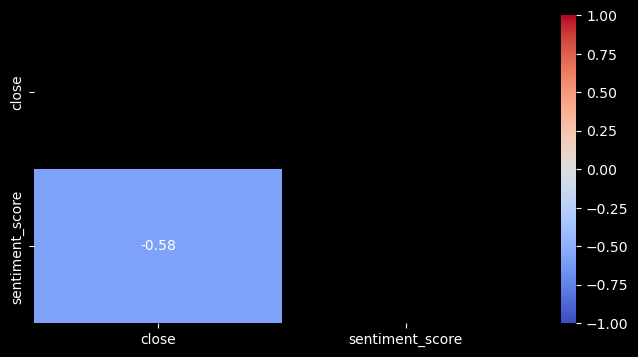

In [990]:
#Correlation matrix

fig,axs=plt.subplots(figsize=(8,4))

corr_data=forecast[["close","sentiment_score"]]

matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()